# Assignment 1
## Medical Patient No Show

### Team members: Luay Dajani, Dana Geislinger, Chris Morgan, Caroll Rodriguez
##### Github - https://github.com/cdmorgan103/7331DataMiningNoShow

## Business Understanding
We utilized the Kaggle No Show appointment data that contains the show/no-show status for several clinics across Brazil that are a part of a central healthcare system. it has 110,527 records and 14 attributes. This data was collected in 2016 and shows the show/no-show behavior of the patients across the different medical facilities (that are identified as the Neighborhood location).  

No Show in the medical world can be large cost for clinics and health systems. With more healthcare institutions margins shrinking and an effort to modernize the delivery of healthcare, prioritize nonproductive time has become a more common focus.  As the institution's capacity becomes more constrained and scheduling time frames grow into the weeks, no show is often cited as becoming an increasing issue and many medical systems have gone to extreme lengths to reduce these costly occurrences. 

This has led many institutions to various actions such as appointment confirmation via SMS, consumer engagement via email/web, strict planned overbooking rates, and even predictive modeling (my healthcare employer has done this).

In the case of predictive modeling, we have to not only think of how much yield are model can reasonably contribute, but we also have to consider the impact of a predicted No-show. Are we going to overbook for predicted no-show patients? If we predict No-show to often and have "Show patients", there is the potential for serious ramifications in the form of clinical overload. Therefore, it is critical to ensure that we consider how the model will be utilized and consider being as conservative as possible for no-show prediction.

As data scientists, it will be critical for us to not only explain model performance, but coach business leaders on how the model will work and be impacted by changes. This means establishing an effective communication channel between business leaders and the Data science team so impacts of any operational changes (i.e. changing scheduling practices, adding pre-appointment verification calls, etc.). Further, this may mean helping coach business leaders on how they can use the model and where to put resources to improve business performance (i.e. following up with high probability no-show appointments before their appointment).




## Data Meaning Type

### Data Meaning
This dataset contains 110,527 appointment records for clinics located across Brazil. The dataset includes 11 meaningful predictors relating to each appointment and to the patient that scheduled that appointment. Unique numeric identifiers are provided for each patient as well as each appointment. The response variable of interest for this data set, *No-show*, is a boolean variable denoting whether or not a patient made it to their scheduled appointment.

Of the 11 predictor variables (the 2 unique identifiers are excluded), there are 2 timepoint, 1 integer, 1 categorical, and 7 boolean variables. Data are provided that generally describe a patient's health problems as well as their age, gender, and scholastic background. In addition to patient information, we are given data pertaining to the location and time of the appointment as well as whether or not the patient was notified about their appointment with an automated SMS reminder.

The following table describes all the variables provided in greater detail. Perhaps the most intriguing variable is *Scholarship*, which is related to the Bolsa Família social program instituted in Brazil. According to the dataset curator, "the best explanation about this variable that indicates if the person receives a scholarship or not" (source: https://www.kaggle.com/joniarroba/noshowappointments/discussion/45899). Based on this description, we assume that this variable defines whether or not a patient is currently receiving financial aid as part of this social program. Participants in Bolsa Família must have an income of less than $170/month, must attend regular medical checkups for mothers and children in the household, and children must regularly attend school (source: https://www.wilsoncenter.org/article/programa-bolsa-familia).

| Variable Name  | Data Type | Variable Type         | Description                                                             |
| -------------- | --------- | --------------------- | ----------------------------------------------------------------------- |
| PatientID      | Interval  | Identifier            | Unique ID number for each patient.                                      |
| AppointmentID  | Interval  | Identifier            | Unique ID number for each appointment.                                  |
| Gender         | Nominal   | Binary Predictor      | Sex of the patient (Male/Female).                                       |
| ScheduledDay   | Interval  | Date/Time Predictor   | **Date** and **Time** when the patient called to schedule their appointment. Should always be before *AppointmentDay*.                                                                         |
| AppointmentDay | Interval  | Date Predictor        | Scheduled appointment **Date**. Appointment **Times** are not provided. |
| Age            | Ratio     | Integer Predictor     | Age of the patient in years.                                            |
| Neighbourhood  | Nominal   | Categorical Predictor | The neighborhood in which the appointment facility is located.          |
| Scholarship    | Ordinal   | Boolean Predictor     | Whether or not the patient receives Bolsa Família financial aid. To receive this benefit, a patient's income must be under the poverty threshold, all children in the household must be vaccinated and regularly attending school, and mothers and children must receive routine medical care.                                    |
| Hipertension   | Ordinal   | Boolean Predictor     | Whether or not a patient is classified as hypertensive (has high blood pressure).                                                                                                                     |
| Diabetes       | Ordinal   | Boolean Predictor     | Whether or not a patient is diagnosed as a diabetic.                    |
| Alcoholism     | Ordinal   | Boolean Predictor     | Whether or not a patient is classified as an alcoholic.                 |
| Handcap        | Ordinal   | Boolean Predictor     | Whether or not a patient is diagnosed as being handicapped.             |
| SMS_received   | Nominal   | Boolean Predictor     | Whether or not a patient received an SMS (text message) reminder for   their appointment.                                                                                                             |
| No-show        | Nominal   | Boolean Response      | Whether or not a patient showed up for their appointment. True means they **did not** show up, False means they **did** show up.                                                                         |

#### Created Variables
| Variable Name  | Data Type | Variable Type         | Description                                                             |
| -------------- | --------- | --------------------- | ----------------------------------------------------------------------- |
| DaysInAdvance  | Ratio     | Integer Predictor     | Value for how many days in advance the appointment was scheduled.       |
| ScheduledDOW   | Nominal   | Categorical Predictor | Day of the week for the day the patient scheduled the appointment.      |
| AppointmentDOW | Nominal   | Categorical Predictor | Day of the week for patient appointment.                                |
| ScheduledTime  | Interval  | Time Predictor        | **Time** of day when an appointment was scheduled.                      |

Dataset from: https://www.kaggle.com/joniarroba/noshowappointments

### Verify Data Quality

To verify the data quality, we will first import the raw data as a Pandas DataFrame object. Next, we will determine whether or not the data requires cleaning or modifications before deeper analysis.  This process will include changing variable types and names to more practically useful formats. Finally, we will perform basic exploratory data analysis to elucidate any potentical patterns or trends within the data.

In [1]:
# Import required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from pprint import pprint
from IPython.display import display

# Load the data into variable 'df'
df = pd.read_csv('data/KaggleV2-May-2016.csv')

# Get an overview of the raw data
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


With the raw data imported, we see already that there are no null (missing) values for any of the 110,527 observations in the data set. However, most of the categorical or binary variables are incorrectly stored as generic numpy objects or 64-bit integers. Furthermore, the date-time columns are stored as generic numpy objects. These columns should be converted to the correct data types. Finally, *ScheduledDay* includes time of day, but *AppointmentDay* does not, so we will separate the Scheduled time of day into a new variable; this way, it will be easy to compare the scheduled/actual **days**, while still retaining the time of day at which the appointment scheduling occured.

In [2]:
# Convert categorical variables to the correct datatype
categ_features = ['Gender', 'Neighbourhood', 'Scholarship', 'Hipertension', 'Diabetes',
                  'Alcoholism', 'Handcap', 'SMS_received', 'No-show'
                  ]
df[categ_features] = df[categ_features].astype('category')

# Pull-out the scheduled time of day as a new variable (ScheduledTime) and re-insert into df
df.ScheduledDay, ScheduledTime = df.ScheduledDay.str.split('T', 1).str
df.insert(loc=4, column='ScheduledTime', value=ScheduledTime)

# Convert date-time variables to the correct type using the C-style fmt codes
df.ScheduledDay = pd.to_datetime(df.ScheduledDay, format="%Y-%m-%d")
df.ScheduledTime = pd.to_datetime(df.ScheduledTime, format="%H:%M:%SZ").dt.time
df.AppointmentDay = pd.to_datetime(df.AppointmentDay, format="%Y-%m-%dT%H:%M:%SZ")

# Reprint df info to check
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,ScheduledTime,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29,18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29,16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29,16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29,17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29,16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


The *PatientId* column was cast as a floating point variable, because there are some rows that erroneously contain data after the decimal point. We will convert these rows to integers and check if the ID numbers are unique for each row. It should be noted that it would not be incorrect to have multiple identical patient ID's, as these would describe multiple appointments made for the same patient. However, appointment ID should be unique for each observation. We will check these values before and after the conversion of *PatientId* to make sure that each patient is correctly identified after the conversion.

In [3]:
# Print the number of unique appointment IDs
print("Unique Appointment IDs: %d" %  len(df.AppointmentID.unique()))
print("Total Appointments:     %d\n" % len(df.AppointmentID))

# Print the number of unique patient IDs
print("Unique Patient IDs Before Conversion: %d" % len(df.PatientId.unique()))

# Cast PatientId as int
df.PatientId = df.PatientId.astype(np.int64)

# Double check the counts
print("Unique Patient IDs After Conversion:  %d" % len(df.PatientId.unique()))

Unique Appointment IDs: 110527
Total Appointments:     110527

Unique Patient IDs Before Conversion: 62299
Unique Patient IDs After Conversion:  62299


This tells us that each appointment is indeed uniquely identified, but that all appointments in the dataset were made by the same group of 62,299 patients.

#### Cleaning the data
This data set is relatively clean in its raw state, with no missing values in any columns. However, there are some inconsistencies and errors that must be corrected before further analysis can be performed:

Since this dataset originated in a non-english speaking country, there are some columns with names that are misspelled. There are also some columns that are named inconsistently from the rest of the data. These names will be changed before further analysis is performed.

In [4]:
# Rename incorrect column names.
df = df.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap', 'SMS_received': 'SMSReceived', 'No-show': 'NoShow'})
pprint(list(df.columns))

['PatientId',
 'AppointmentID',
 'Gender',
 'ScheduledDay',
 'ScheduledTime',
 'AppointmentDay',
 'Age',
 'Neighbourhood',
 'Scholarship',
 'Hypertension',
 'Diabetes',
 'Alcoholism',
 'Handicap',
 'SMSReceived',
 'NoShow']


There are sub-zero values for age and two unique patients with an age of 115. This could be documented oddly for perhaps a pregnant mother's child (hence a negative age value since the child isn't born). Since there is no way of knowing if ts only one data point, these values will be simply imputed with the median value for the dataset. It is unlikely the 2 patients who are actually 115, but it is feasible to reach this age, and most likely, these patients true age are within the vicinity of the age documented but are slightly off due to poor birth documentation. In this case the values of 115 and other suspicously high age values will remain the same at this point.  

In [5]:
# Print observations where age is minimum or maximum
display(df.loc[(df.Age == -1) | (df.Age == 115)])

# Impute the values of sub zero age observations
df.Age=df.Age.replace(-1, int(df.Age.median()))

,PatientId,AppointmentID,Gender,ScheduledDay,ScheduledTime,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow
63912,31963211613981,5700278,F,2016-05-16,09:17:44,2016-05-19,115,ANDORINHAS,0,0,0,0,1,0,Yes
63915,31963211613981,5700279,F,2016-05-16,09:17:44,2016-05-19,115,ANDORINHAS,0,0,0,0,1,0,Yes
68127,31963211613981,5562812,F,2016-04-08,14:29:17,2016-05-16,115,ANDORINHAS,0,0,0,0,1,0,Yes
76284,31963211613981,5744037,F,2016-05-30,09:44:51,2016-05-30,115,ANDORINHAS,0,0,0,0,1,0,No
97666,748234579244724,5717451,F,2016-05-19,07:57:56,2016-06-03,115,SÃO JOSÉ,0,1,0,0,0,1,No
99832,465943158731293,5775010,F,2016-06-06,08:58:13,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No


#### Defining New Variables
Next, we determine how many days in advance the appointment was scheduled and create it as a new feature. This will ensure values are reasonable and that there are no negative datapoints. Examination shows we do have some datapoints that need to be corrected.

In [6]:
# Create a column showing days in advance
df['DaysInAdvance']=(df['AppointmentDay']-df['ScheduledDay']).dt.days

# List appointments with negative days in advance (logically impossible)
df.loc[df.DaysInAdvance<0]

,PatientId,AppointmentID,Gender,ScheduledDay,ScheduledTime,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,DaysInAdvance
27033,7839272661752,5679978,M,2016-05-10,10:51:53,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,-1
55226,7896293967868,5715660,F,2016-05-18,14:50:41,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,-1
64175,24252258389979,5664962,F,2016-05-05,13:43:58,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,-1
71533,998231581612122,5686628,F,2016-05-11,13:49:20,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,-6
72362,3787481966821,5655637,M,2016-05-04,06:50:57,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,Yes,-1


Since scheduling an appointment on a later day than the appointment is scheduled for is impossible, we will impute the *ScheduledDay* for all appointments with *DaysInAdvance* < 0 as the same day as the appointment. This seems to be a logical imputation since many of the existing appointments in the data set were scheduled the dame day as the appointment, and appointments with scheduled days in the future are likely data entry errors.

In [7]:
# Run through the data to ensure no appointments that are scheduled after the appointment(which would be impossible).
# If true, scheduled day with the appointment day is assumed as the a same day as the appointment, then recalculate advance field
df['ScheduledDay'] = np.where(df['ScheduledDay']>df['AppointmentDay'], df['AppointmentDay'], df['ScheduledDay'])
df['DaysInAdvance']=(df['AppointmentDay']-df['ScheduledDay']).dt.days

#Examine again, we have corrected the bad scheduled appointment data (table is now empty)
df.loc[df.DaysInAdvance<0]

,PatientId,AppointmentID,Gender,ScheduledDay,ScheduledTime,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,DaysInAdvance


The final variable we will add to the data set is the day of the week of an appointment and the day of the week on which an appointment was scheduled. The day of the week could provide important insights into trends in the data that might go unnoticed as raw dates.

In [8]:
# Create a day of week variable for both the scheduled day and the appointment day which will allows to examining
#  any potential trends related to the day of the week and appointment no-show
df['ScheduledDOW'] = df['ScheduledDay'].dt.weekday_name
df['AppointmentDOW'] = df['AppointmentDay'].dt.weekday_name

#Check the variables
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 18 columns):
PatientId         110527 non-null int64
AppointmentID     110527 non-null int64
Gender            110527 non-null category
ScheduledDay      110527 non-null datetime64[ns]
ScheduledTime     110527 non-null object
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null category
Scholarship       110527 non-null category
Hypertension      110527 non-null category
Diabetes          110527 non-null category
Alcoholism        110527 non-null category
Handicap          110527 non-null category
SMSReceived       110527 non-null category
NoShow            110527 non-null category
DaysInAdvance     110527 non-null int64
ScheduledDOW      110527 non-null object
AppointmentDOW    110527 non-null object
dtypes: category(9), datetime64[ns](2), int64(4), object(3)
memory usage: 8.5+ MB


,PatientId,AppointmentID,Age,DaysInAdvance
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.089218,10.183792
std,2.560949e+14,7.129575e+04,23.109921,15.254924
min,3.921700e+04,5.030230e+06,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,4.000000
75%,9.439172e+13,5.725524e+06,55.000000,15.000000
max,9.999816e+14,5.790484e+06,115.000000,179.000000


With the data cleaned, we print out the unique values for each variable to identify patterns and to better understand our data. This also allows us to verify that the contents of the data are as we understand them.

In [9]:
# Print descriptive info for the unique values for each predictor
print('Gender:', list(df.Gender.unique()))
print('Scheduled Dates: %s to %s' % (min(df.ScheduledDay).date(), max(df.ScheduledDay).date()))
print('Appointment Dates: %s to %s' % (min(df.AppointmentDay).date(), max(df.AppointmentDay).date()))
print('Age Range: %d to %d Years Old' % (min(df.Age), max(df.Age)))
print('Number of Distinct Neighbourhoods:', len(df.Neighbourhood.unique()))
print('Scholarship:', list(df.Scholarship.unique()))
print('Hypertension:', list(df.Hypertension.unique()))
print('Diabetes:', list(df.Diabetes.unique()))
print('Alchoholism:', list(df.Alcoholism.unique()))
print('Handicap:', list(df.Handicap.unique()))
print('SMSReceived:', list(df.SMSReceived.unique()))
print('NoShow:', list(df.NoShow.unique()))
print('Range of Scheduled Days in Advance: %d to %d Days' % (min(df.DaysInAdvance), max(df.DaysInAdvance)))
print('ScheduledDOW:', sorted(df.ScheduledDOW.unique()))
print('AppointmentDOW:', sorted(df.AppointmentDOW.unique()))

Gender: ['F', 'M']
Scheduled Dates: 2015-11-10 to 2016-06-08
Appointment Dates: 2016-04-29 to 2016-06-08
Age Range: 0 to 115 Years Old
Number of Distinct Neighbourhoods: 81
Scholarship: [0, 1]
Hypertension: [1, 0]
Diabetes: [0, 1]
Alchoholism: [0, 1]
Handicap: [0, 1, 2, 3, 4]
SMSReceived: [0, 1]
NoShow: ['No', 'Yes']
Range of Scheduled Days in Advance: 0 to 179 Days
ScheduledDOW: ['Friday', 'Monday', 'Saturday', 'Thursday', 'Tuesday', 'Wednesday']
AppointmentDOW: ['Friday', 'Monday', 'Saturday', 'Thursday', 'Tuesday', 'Wednesday']


Viewing the ranges/categories for each variable helps illuminates the data and conveys some interesting trends.

First, the date ranges show that appointments were scheduled as early as November 2015, but this dataset does not include any actual appointments prior to the end of April 2016. The latest appointment takes place on June 8th, 2016 and this is also the final date on which an appointment was scheduled.

I is interesting to note the large age range of patients in the data set, and important to note that the patients in this data set could have visited clinics in any one of 81 possible Brazilian neighborhoods.

It is also interesting to note that patients schedule appointments over a wide range, from the same to almost a half a year in advance. Finally, it is very interesting to notice that there were both no appointments scheduled or visits taken on Sundays throughout the entire dataset. This seems to indicate that medical clinics in Brazil are closed Sunday, both for scheduling appointments and seeing patients.

In [10]:
# Count the number of rows in which handicap takes on each value
display(df.groupby(df.Handicap).Handicap.count())

# Count the number of Handicap > 1 appointments
print('%d appointments have Handicap > 1' % len(df.loc[(df.Handicap == 2) | (df.Handicap == 3) | (df.Handicap == 4)]))

Handicap
0    108286
1      2042
2       183
3        13
4         3
Name: Handicap, dtype: int64

199 appointments have Handicap > 1


Looking at the variable ranges in this way shows us one final issue with the data that wasn't noticed previously; the *Handicap* variable is meant to be a boolean feature denoting whether a patient is disabled (1) or not (0). However, there are values of 2, 3, 4, and 5 entered in for this data as in 199 rows as well.

We believe that it is likely that clinics erroneously input a handicap value on an ordinal scale from 0-4 instead of as a boolean 0/1 value. Since these observations comprise only a small portion (199 / 110,527) of the data, it makes sense to impute them. If we assume that each patient listed with *Handicap* > 1 has some degree of handicap, it makes sense to impute these values as 1.

In [11]:
# Replace Handicap 2, 3, 4 with 1
df.Handicap = pd.cut(df.Handicap, bins=[-1,0.9,5], labels=[0,1])
display(df.groupby(df.Handicap).Handicap.count())

Handicap
0    108286
1      2241
Name: Handicap, dtype: int64

Now that the raw data has been cleaned and variables have been investigated, we will save the updated data set to a new csv file.

In [12]:
#df = pd.read_csv("data/updated.csv")

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 18 columns):
PatientId         110527 non-null int64
AppointmentID     110527 non-null int64
Gender            110527 non-null category
ScheduledDay      110527 non-null datetime64[ns]
ScheduledTime     110527 non-null object
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null category
Scholarship       110527 non-null category
Hypertension      110527 non-null category
Diabetes          110527 non-null category
Alcoholism        110527 non-null category
Handicap          110527 non-null category
SMSReceived       110527 non-null category
NoShow            110527 non-null category
DaysInAdvance     110527 non-null int64
ScheduledDOW      110527 non-null object
AppointmentDOW    110527 non-null object
dtypes: category(9), datetime64[ns](2), int64(4), object(3)
memory usage: 8.5+ MB


### Explore Joint Attributes
Visualize relationships between attributes: Look at the attributes via scatter plots, correlation, cross-tabulation, group-wise averages, etc. as appropriate. Explain any interesting relationships.


In [14]:
#library to load
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
from pylab import rcParams
import seaborn as sns
import pandas as pd
import scipy

In [15]:
#new variables
df['age_range'] = pd.cut(df.Age,[0,16,65,1e6],3,labels=['child','adult','senior']) 
distinct_pID = df['PatientId'].nunique()
cat_var = df[['Gender','age_range','Neighbourhood','Scholarship','Hypertension','Diabetes','Alcoholism','Handicap','SMSReceived','ScheduledDOW','AppointmentDOW','NoShow']]
con_var = df[['ScheduledDay','ScheduledTime','AppointmentDay']]
df = df.replace({'NoShow': {'Yes': True, 'No': False}})

## Age Range and Gender
For this dataset there is a heavier concentration of Females with appointments in the adult range of 16-65 than mailes.
Interesting to see that the amount of children with appointments is simular. This could be due to mothers making appointments for children as in the Braziliam culture it is common for mothers to take care of children care. It seems that Adult and Senior males have half as many appointments in the system than females.
Since the number of apppointments is double comapared to the number of Patients, this signifies multiple appointments made for unique patients.
Seniors have a tendency to have the highest day in advance that appointment is scheduled.
#### Patients and Appointments

In [16]:
agerange_by_gender = df.groupby(['Gender','age_range']).agg({'PatientId':'nunique','AppointmentID':'nunique','DaysInAdvance':'mean'})
print("Percenage of Total appointments")
agerange_by_gender

Percenage of Total appointments


PatientId  AppointmentID  DaysInAdvance
Gender age_range                                         
F      child           6811          11155       9.694756
       adult          27153          50037      10.534105
       senior          5138           8927      11.348941
M      child           6593          11176       9.315855
       adult          12020          21319       9.308692
       senior          2585           4374      11.110882

### Days of the Week
There is a higher number of unique patients with appointments on Tuesday and Wednesday.
Saturday has a very small amount of appointments. Could be due to error in dataset or there are less doctors with available Saturday appointments available.
No appointments made on Sundays most likely because these offices do not work on Sundays.
Not much difference in the mean days in advance patients make appointments except for a low average for Saturdays.

#### Patients and Appointments

In [17]:
#create an index to order Days of the Week
df['AppointmentDOW'] = pd.Categorical(df['AppointmentDOW'], categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'], ordered=True)

In [18]:
appt_by_DOW = df.groupby(['AppointmentDOW']).agg({'PatientId':'nunique','AppointmentID':'nunique','DaysInAdvance':'mean'})
print("Unique Patients and Total Appointments with Days In Advance")
appt_by_DOW.sort_index()

Unique Patients and Total Appointments with Days In Advance


,PatientId,AppointmentID,DaysInAdvance
AppointmentDOW,,,
Monday,18011,22715,10.838741
Tuesday,20175,25640,10.020671
Wednesday,20083,25867,9.965787
Thursday,14295,17247,9.619586
Friday,15168,19019,10.441821
Saturday,38,39,4.230769
Sunday,0,0,NaN


Text(0,0.5,'Total No Show Appointments')

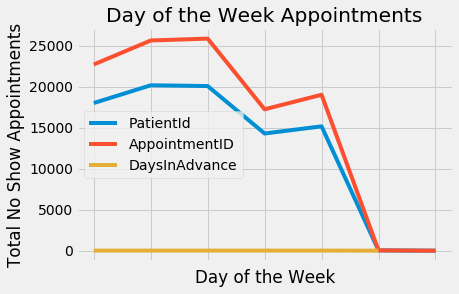

In [19]:
plot_by_DOW = appt_by_DOW.plot(title='Day of the Week Appointments')
plot_by_DOW.set_xlabel('Day of the Week')
plot_by_DOW.set_ylabel('Total No Show Appointments')

### Patient Attributes
Since there are more adults in this dataset, its not surprising to know that Patient attributes would be higher in this regards
#### Patients and Appointments

In [20]:
#agerange_by_gender_PA = df.groupby(['Gender','age_range','Scholarship','Hypertension','Diabetes','Alcoholism','Handicap']).agg({'PatientId':'nunique','AppointmentID':'nunique'})
#print("Percenage of Total appointments")
#agerange_by_gender_PA

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 19 columns):
PatientId         110527 non-null int64
AppointmentID     110527 non-null int64
Gender            110527 non-null category
ScheduledDay      110527 non-null datetime64[ns]
ScheduledTime     110527 non-null object
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null category
Scholarship       110527 non-null category
Hypertension      110527 non-null category
Diabetes          110527 non-null category
Alcoholism        110527 non-null category
Handicap          110527 non-null category
SMSReceived       110527 non-null category
NoShow            110527 non-null bool
DaysInAdvance     110527 non-null int64
ScheduledDOW      110527 non-null object
AppointmentDOW    110527 non-null category
age_range         106988 non-null category
dtypes: bool(1), category(10), datetime64[ns](2), int64(4), object(2)
memory usa

In [23]:
#change datatype of categorical variables for summary tables below
categ_features = ['Scholarship', 'Hypertension', 'Diabetes',
                  'Alcoholism', 'Handicap', 'SMSReceived']
df[categ_features] = df[categ_features].astype('int64')

In [48]:
print("Unique Patients with Scholarships")
agerange_by_gender_SS = df.groupby(['age_range','Gender']).PatientId.nunique(),df.Scholarship.sum
agerange_by_gender_SS

Unique Patients with Scholarships


(age_range  Gender
 child      F          6811
            M          6593
 adult      F         27153
            M         12020
 senior     F          5138
            M          2585
 Name: PatientId, dtype: int64, <bound method Series.sum of 0         0
 1         0
 2         0
 3         0
 4         0
 5         0
 6         0
 7         0
 8         0
 9         0
 10        0
 11        0
 12        1
 13        0
 14        0
 15        0
 16        0
 17        1
 18        1
 19        0
 20        0
 21        0
 22        0
 23        0
 24        0
 25        0
 26        0
 27        0
 28        0
 29        0
          ..
 110497    0
 110498    0
 110499    0
 110500    0
 110501    0
 110502    0
 110503    0
 110504    0
 110505    0
 110506    0
 110507    0
 110508    0
 110509    0
 110510    0
 110511    0
 110512    0
 110513    0
 110514    0
 110515    0
 110516    0
 110517    0
 110518    0
 110519    0
 110520    0
 110521    0
 110522    0
 110523    0


In [39]:
agerange_by_gender_HT = df.groupby(['age_range','Gender']).agg({'PatientId':'nunique','Hypertension':'freq'})
print("Unique Patients with Hypertension")
agerange_by_gender_HT

AttributeError: 'SeriesGroupBy' object has no attribute 'freq'

In [38]:
agerange_by_gender_DB = df.groupby(['age_range','Gender']).agg({'PatientId':'nunique','Diabetes':['apply']})
print("Unique Patients with Diabetes")
agerange_by_gender_DB

TypeError: apply() missing 1 required positional argument: 'func'

In [33]:
agerange_by_gender_AC = df.groupby(['age_range','Gender']).agg({'PatientId':'nunique','Alcoholism':'sum'})
print("Unique Patients with Alcholism")
agerange_by_gender_AC

Unique Patients with Alcholism


PatientId  Alcoholism
age_range Gender                       
child     F            6811           6
          M            6593          15
adult     F           27153        1160
          M           12020        1870
senior    F            5138          57
          M            2585         252

In [ ]:
daily_noshows = df.groupby(['ScheduledDay','ScheduledDOW','NoShow']).size()
print(daily_noshows)

There is reason to believe that some data is missing to the earlier dates in the datasets. The number of appointments which paitients missed (No Show) increases as we get into the later months. 
Also, there is a possibility that there were specific events happening in the cities that prompted more patients to no show for their appointments. Our idea is soccer tournments may had something to do with it.

In [ ]:
plot_by_daily_noshows = daily_noshows.plot(title='Daily Counts of Appointments')

plot_by_daily_noshows.set_xlabel('Daily')
plot_by_daily_noshows.set_ylabel('Total No Show by Appointment Date')

It seems that there is a relationshiip between age of men around 60-65 and suffering of alcoholism. This might be a factor with no-show appointments for men.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="dark")

f, ax = plt.subplots(figsize=(8, 8))

# Show each distribution with both violins and points
sns.violinplot(x="Age",y="Alcoholism",data=df, inner="box", palette="Set1", cut=2, linewidth=3)

sns.despine(left=True)

f.suptitle('Age by Alcoholism', fontsize=18, fontweight='bold')
ax.set_xlabel("Age",size = 16,alpha=0.7)
ax.set_ylabel("Alcoholism",size = 16,alpha=0.7)

Handicap when compared to Age does not show significance either way.

In [ ]:
f, ax = plt.subplots(figsize=(8, 8))

# Show each distribution with both violins and points
sns.violinplot(x="Age",y="Handicap",data=df, inner="box", palette="Set1", cut=2, linewidth=3)

sns.despine(left=True)

f.suptitle('Age by Handicap', fontsize=18, fontweight='bold')
ax.set_xlabel("Age",size = 16,alpha=0.7)
ax.set_ylabel("Handicap",size = 16,alpha=0.7)

### Explore Attributes and Class
To find correlation between linearly related continuous numeric variables.

add this here with visual
From the 20.2% of total No Show appointments, Tuesday showed the greater percentage of No Shows based on total number of appointment followed by Wednesday then Mondays. There is a relationship between the Day of the week and when No Show happen.

In [ ]:
a=df['NoShow']
count_noshows = sum(a)
print("Number of NoShows")
count_noshows

In [ ]:
count_appt = df['AppointmentID'].count()
print("Number of Appointments") 
count_appt

Based on the total appointments, 20.2% of those appointments ended in No Show.

In [ ]:
print("Percentage of NoShow Appointments")
(count_noshows / count_appt)*100

In [ ]:
pd.crosstab(df.age_range,df.NoShow, margins=True)

In [ ]:
pd.crosstab(df.age_range,df.NoShow, normalize='index')*100

The average age for each age group that did not show up for their appointment.

In [ ]:
pd.crosstab([df.age_range],[df.NoShow],values=df.Age, aggfunc=np.average)

In [ ]:
#Frequency of missing an appointment based on Appointment Day of Week
pd.crosstab(df.NoShow,df.AppointmentDOW, margins=True,values=df.AppointmentID, aggfunc=len)

In [ ]:
#Frequency of missing an appointment based on the day of the week the appointment was made

pd.crosstab(df.NoShow,df.ScheduledDOW, margins=True,values=df.AppointmentID, aggfunc=len)

Violin Plots for Joint Attributes
The median represented by the white dot tell us that the age distribution between gender are closely 
aligned but not equal. 

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="dark")

f, ax = plt.subplots(figsize=(8, 8))

# Show each distribution with both violins and points
sns.violinplot(x="Gender",y="NoShow",data=df, inner="box", palette="Set1", cut=2, linewidth=3)

sns.despine(left=True)

f.suptitle('NoShow by Gender', fontsize=18, fontweight='bold')
ax.set_xlabel("Gender",size = 16,alpha=0.7)
ax.set_ylabel("NoShow",size = 16,alpha=0.7)

Shows more Diabetics kept their appointments versus those without Diabeties. Or is this saying more Diabetics have the probability of showing up for their appointments.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="dark")

f, ax = plt.subplots(figsize=(8, 8))

# Show each distribution with both violins and points
sns.violinplot(x="Diabetes",y="NoShow",data=df, inner="box", palette="Set1", cut=2, linewidth=3)

sns.despine(left=True)

f.suptitle('NoShow by Diabetes', fontsize=18, fontweight='bold')
ax.set_xlabel("Diabetes",size = 16,alpha=0.7)
ax.set_ylabel("NoShow",size = 16,alpha=0.7)

Female and Males have the same chance to miss their appointments.

In [ ]:
f, ax = plt.subplots(figsize=(8, 8))

# Show each distribution with both violins and points
sns.violinplot(x="Gender",y="NoShow",data=df, inner="box", palette="Set1", cut=2, linewidth=3)

sns.despine(left=True)

f.suptitle('Gender by NoShows', fontsize=18, fontweight='bold')
ax.set_xlabel("Gender",size = 16,alpha=0.7)
ax.set_ylabel("NoShow",size = 16,alpha=0.7)

Frequency Counts

There were more females that no showed their appointment than males.
NOTE: I WAS NOT ABLE TO FIGURE OUT HOW TO COUNT UNIQUIE PATIENTS.

In [ ]:
var = df.groupby('Gender').NoShow.sum() #grouped NoShows at Gender level
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('Gender')
ax1.set_ylabel('Number of No Shows')
ax1.set_title("Gender vs Sum of No Shows")
var.plot(kind='bar')

There is a low count of NoShow for Patients with at least 1 Handicap.

In [ ]:
var = df.groupby('Handicap').NoShow.count() #grouped NoShows at Gender level
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('Handicap')
ax1.set_ylabel('Number of No Shows')
ax1.set_title("Handicap vs No Shows")
var.plot(kind='bar')

Those with hypertension showed a lower total number of noshows than those without hypertension.

In [ ]:
var = df.groupby('Hypertension').NoShow.count() #grouped NoShows at Gender level
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('Hypertension')
ax1.set_ylabel('Number of No Shows')
ax1.set_title("Hypertension vs No Shows")
var.plot(kind='bar')

The number of no shows based on a reminder text sent to patients show a little than half of the no shows coming from those that had text messaging enabled. 

In [ ]:
var = df.groupby('SMSReceived').NoShow.count() #grouped NoShows at Gender level
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('SMSReceived')
ax1.set_ylabel('Number of No Shows')
ax1.set_title("SMSReceived vs No Shows")
var.plot(kind='bar',label=True)

Not sure what this scatter plot is saying

In [ ]:
sns.set(style="ticks")
sns.pairplot(cat_var, hue="NoShow")

In [ ]:
sns.factorplot(x='AppointmentDOW', y='NoShow', hue='NoShow',col='PatientId',strip='bar',data=df[df.NoShow])

In [ ]:
sns.factorplot(x='NoShow', y='AppointmentDOW', strip='box', data=df[df.PatientId.uniquie()])

Heatmap show weak relationships between the numberical variables in the dataset. There is a strong relationship between Appt ID and Days In Advance which makes sense since Appt ID is a sequencial number that goes up as the number of days in advance goes down. ???

In [ ]:
cmap = sns.diverging_palette(220, 10, as_cmap=True) # one of the many color mappings

# plot the correlation matrix using seaborn
sns.set(style="darkgrid") # one of the many styles to plot using

f, ax = plt.subplots(figsize=(9, 9))

sns.heatmap(df.corr(), cmap=cmap, annot=True)

f.tight_layout()

In [ ]:
sns.set(style="white")

# create a plot grid
g = sns.PairGrid(df[['NoShow','Age','Gender','SMSReceived','AppointmentDOW','ScheduledDOW','DaysInAdvance',]], diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d") # use joint kde on the lower triangle
g.map_upper(plt.scatter) # scatter on the upper
g.map_diag(sns.kdeplot, lw=3) # kde histogram on the diagonal